# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [244]:
import pandas as pd

In [245]:
temps = pd.read_csv("data\\temps.csv")

In [246]:
temps

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


### 2. Realiza un análisis exploratorio junto con un Feature Engineering

In [247]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [248]:
temps["actual"].value_counts()

actual
57    16
60    16
68    16
65    13
71    12
55    12
52    11
67    11
59    11
64    11
77    10
51    10
63     9
75     9
49     9
76     9
66     9
53     8
61     8
54     8
48     8
73     8
58     7
56     7
74     7
79     6
81     6
62     6
40     6
69     5
80     5
72     5
44     4
85     4
46     4
45     4
70     4
50     4
41     3
82     3
39     3
42     3
47     2
35     2
87     2
78     2
83     2
89     1
86     1
92     1
88     1
84     1
90     1
43     1
36     1
Name: count, dtype: int64

In [249]:
temps.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [250]:
import seaborn as sns

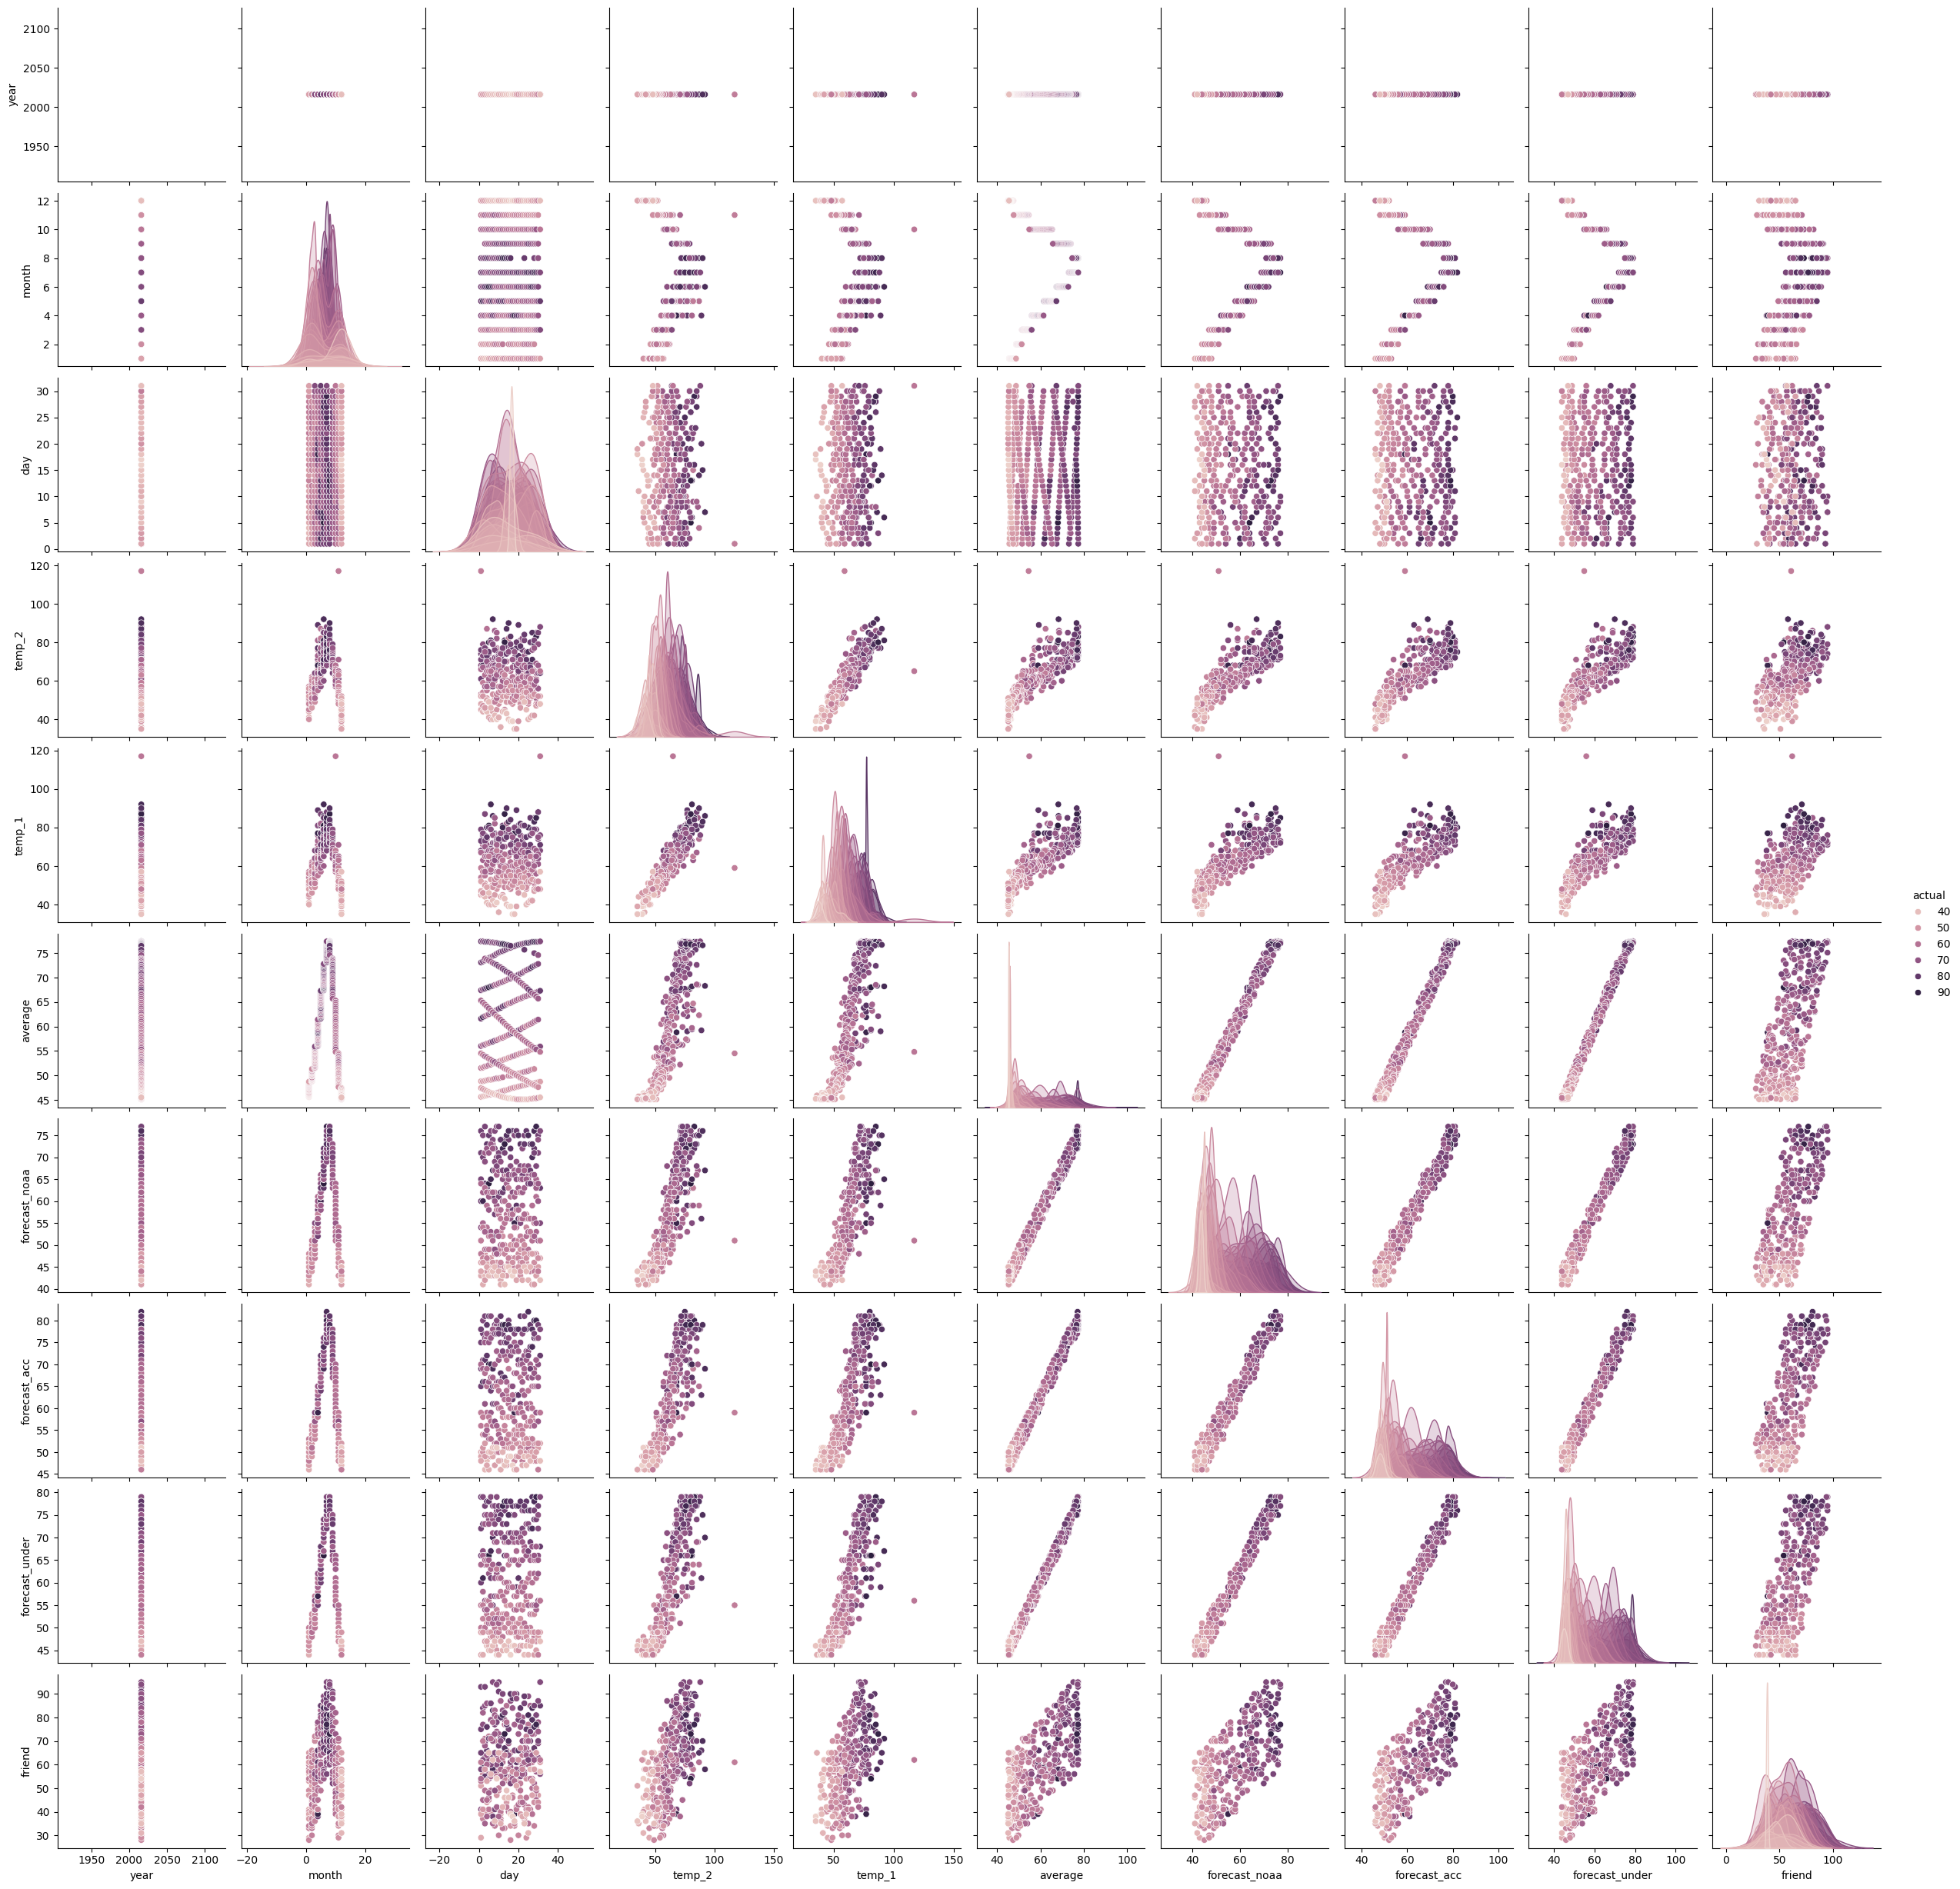

In [251]:
sns.pairplot(temps, hue="actual")

In [252]:
import matplotlib.pyplot as plt

<Axes: >

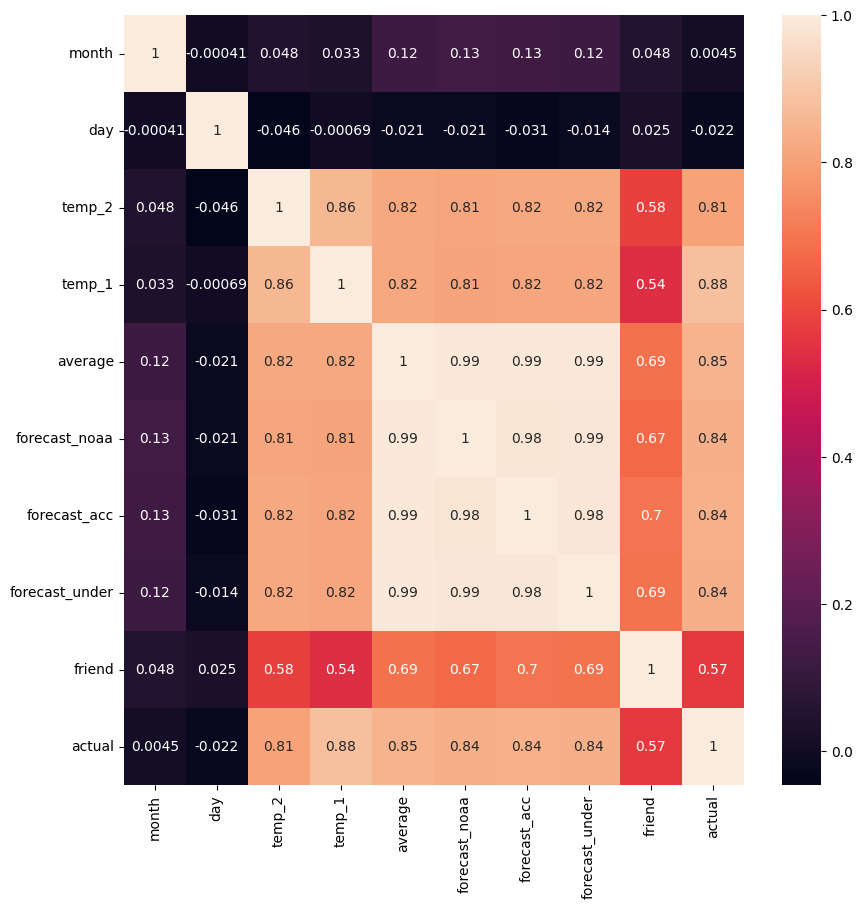

In [253]:
plt.figure(figsize=(10,10))
data = ["month","day","temp_2","temp_1","average","forecast_noaa","forecast_acc","forecast_under","friend","actual"]
sns.heatmap(temps[data].corr(), annot=True)

### 3. Selecciona variables y divide en train y test

In [254]:
from sklearn.model_selection import train_test_split

In [255]:
X = temps.drop(["year", "week", "friend", "actual"], axis=1)
y = temps["actual"]

In [256]:
X

,month,day,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under
0,1,1,45,45,45.6,43,50,44
1,1,2,44,45,45.7,41,50,44
2,1,3,45,44,45.8,43,46,47
3,1,4,44,41,45.9,44,48,46
4,1,5,41,40,46.0,46,46,46
...,...,...,...,...,...,...,...,...
343,12,27,42,42,45.2,41,50,47
344,12,28,42,47,45.3,41,49,44
345,12,29,47,48,45.3,43,50,45
346,12,30,48,48,45.4,44,46,44


In [257]:
y

0      45
1      44
2      41
3      40
4      44
       ..
343    47
344    48
345    48
346    57
347    40
Name: actual, Length: 348, dtype: int64

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 4. Entrena el modelo


In [259]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error

In [260]:
model = DecisionTreeRegressor(random_state=42,max_depth=2)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [261]:
y_pred = model.predict(X_test)

### 5. Evaluación de tu modelo

Calcula el MAE, MAPE, MSE y RMSE.

In [262]:
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

In [263]:
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2%}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 4.66
MAPE: 7.50%
MSE: 33.33
RMSE: 5.77


### 6. Representa el árbol de decisión

In [264]:
from sklearn.tree import plot_tree

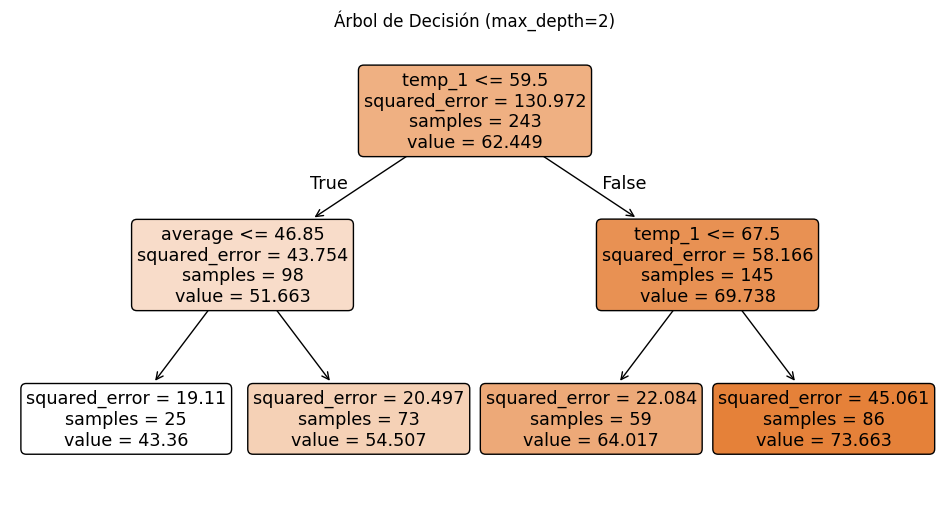

In [265]:
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Árbol de Decisión (max_depth=2)")
plt.show()

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [266]:
Xbis = temps.drop(["year", "week", "friend", "actual"], axis=1)
ybis = temps["actual"]

In [267]:
X_train, X_test, y_train, y_test = train_test_split(Xbis, ybis, test_size=0.3, random_state=42)

In [268]:
model2 = DecisionTreeRegressor(random_state=42,max_depth=3)
model2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [269]:
y_pred = model2.predict(X_test)

### 8. Vuelve a evaluar tu modelo

In [270]:
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

In [271]:
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2%}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 4.21
MAPE: 6.69%
MSE: 30.66
RMSE: 5.54


### 9. Vuelve a representar su árbol

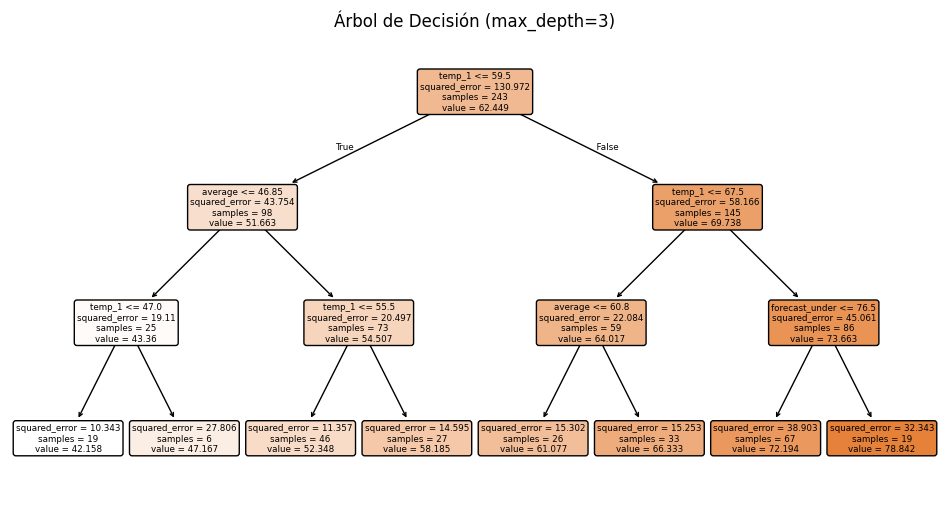

In [272]:
plt.figure(figsize=(12, 6))
plot_tree(model2, feature_names=Xbis.columns, filled=True, rounded=True)
plt.title("Árbol de Decisión (max_depth=3)")
plt.show()

### 10. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [273]:
from sklearn.model_selection import GridSearchCV

In [274]:
model = DecisionTreeRegressor()

parameters = {
    "max_depth" : [2,3,4,5]
}

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error")

In [275]:
dtr_gs.fit(X_train, y_train)
y_pred = dtr_gs.best_estimator_.predict(X_test)

print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", root_mean_squared_error(y_test, y_pred))

MAE 4.210194748430774
MAPE 0.06629118345444458
MSE 29.553040039711863
RMSE 5.436270784252001


In [276]:
dtr_gs.best_params_

{'max_depth': 4}

In [277]:
dtr_gs.best_score_

np.float64(-4.300805114441528)

In [278]:
dtr_gs.best_estimator_

DecisionTreeRegressor(max_depth=4)

### 11. Obten el `feature_importances` de cada variable en el último modelo

In [279]:
best_model = dtr_gs.best_estimator_

In [280]:
importances = best_model.feature_importances_

In [281]:
feature_importances = pd.Series(importances, index=X.columns)

In [282]:
feature_importances = feature_importances.sort_values(ascending=False)

In [283]:
print("Importancia de las variables:")
print(feature_importances)

Importancia de las variables:
temp_1            0.840411
average           0.088353
forecast_under    0.027818
forecast_acc      0.017128
month             0.015868
forecast_noaa     0.004919
day               0.003730
temp_2            0.001775
dtype: float64


### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [284]:
X_12 = temps.drop(["year", "week", "friend", "actual"], axis=1)
y_12 = (temps["actual"] > 59).astype(int)

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X_12, y_12, test_size=0.3, random_state=42)

In [286]:
from sklearn.tree import DecisionTreeClassifier

In [287]:
clf = DecisionTreeClassifier(random_state=42)

In [288]:
param_grid = {
    "max_depth": [2, 3, 4, 5, 6],
    "min_samples_split": [2, 5, 10]
}

In [289]:
grid_clf = GridSearchCV(clf, param_grid, cv=5, scoring="accuracy")
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [290]:
best_clf = grid_clf.best_estimator_

In [291]:
best_clf

DecisionTreeClassifier(max_depth=3, random_state=42)

In [292]:
y_pred = best_clf.predict(X_test)

In [294]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [295]:
print("Mejor combinación de parámetros:", grid_clf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Mejor combinación de parámetros: {'max_depth': 3, 'min_samples_split': 2}
Accuracy: 0.9238095238095239
Matriz de confusión:
[[40  7]
 [ 1 57]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91        47
           1       0.89      0.98      0.93        58

    accuracy                           0.92       105
   macro avg       0.93      0.92      0.92       105
weighted avg       0.93      0.92      0.92       105



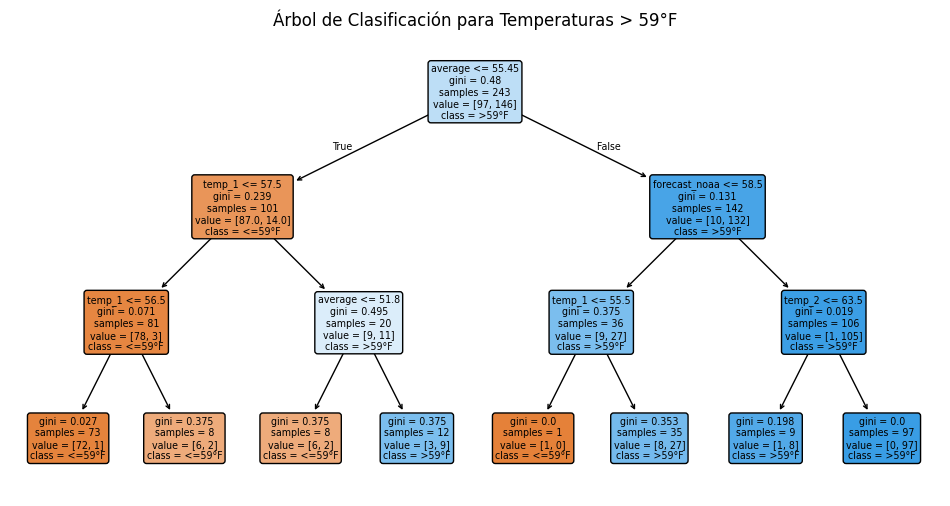

In [296]:
plt.figure(figsize=(12, 6))
plot_tree(best_clf, 
          feature_names=X_12.columns, 
          class_names=["<=59°F", ">59°F"], 
          filled=True, 
          rounded=True)
plt.title("Árbol de Clasificación para Temperaturas > 59°F")
plt.show()